# a) Find the mean and standard deviation of returns for these five stocks.

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Load the uploaded CSV file
file_path = './Stocks_ClosePrice.csv'
stocks_data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the data to understand its structure
stocks_data.head()

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506


In [7]:
return_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']

# 過濾掉缺失值
returns_data = stocks_data[return_columns].dropna()

# 計算每隻股票的平均收益和標準差
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# 將結果整理成數據框顯示
mean_std_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

# 顯示結果
mean_std_df


,Mean Return,Standard Deviation
FB.1,0.000555,0.020943
GOOG.1,0.000189,0.018474
NFLX.1,-0.001250,0.027119
AMZN.1,-0.000302,0.022313
AAPL.1,-0.000056,0.020421


# b) Plot the mean and risk (standard deviation) for these five returns using red stars in a 2-dimensional plane

In [8]:
# Extract return columns
return_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']
returns_data = stocks_data[return_columns].dropna()

# Calculate mean and standard deviation for each stock's returns
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# Create a DataFrame to display results
mean_std_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

In [9]:
print(mean_std_df)

        Mean Return  Standard Deviation
FB.1       0.000555            0.020943
GOOG.1     0.000189            0.018474
NFLX.1    -0.001250            0.027119
AMZN.1    -0.000302            0.022313
AAPL.1    -0.000056            0.020421


In [10]:
from IPython.display import display
display(mean_std_df)


,Mean Return,Standard Deviation
FB.1,0.000555,0.020943
GOOG.1,0.000189,0.018474
NFLX.1,-0.001250,0.027119
AMZN.1,-0.000302,0.022313
AAPL.1,-0.000056,0.020421


In [11]:
import matplotlib.pyplot as plt

C:\Users\shant\AppData\Local\Temp\ipykernel_2016\4101039797.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_returns[i], mean_returns[i], stock, fontsize=12, ha='right')  # Also swap the text coordinates


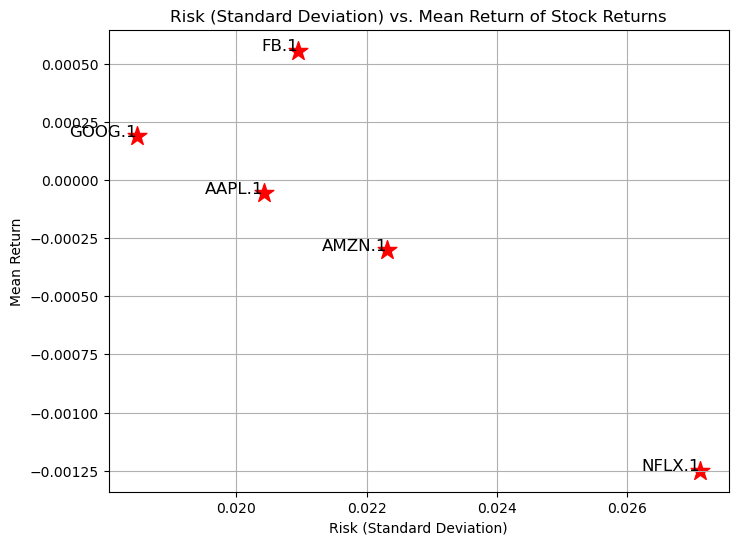

In [12]:
mean_returns = returns_data.mean()
std_returns = returns_data.std()

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)  # Swapped the X and Y axes data

# Label each point with the stock name
for i, stock in enumerate(return_columns):
    plt.text(std_returns[i], mean_returns[i], stock, fontsize=12, ha='right')  # Also swap the text coordinates

# Add labels and title
plt.title('Risk (Standard Deviation) vs. Mean Return of Stock Returns')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.grid(True)

# Display the chart
plt.show()


# c) Randomly select weights so that each weight is nonnegative and sums to 1. Print these random weights, and calculate the portfolio's mean return and standard deviation.


In [25]:
# 隨機生成五支股票的權重，使其和為1
random_weights = np.random.random(len(return_columns))
random_weights /= np.sum(random_weights)

# 計算投資組合的平均收益率和標準差
portfolio_mean_return = np.dot(random_weights, mean_returns)
portfolio_risk = np.sqrt(np.dot(random_weights.T, np.dot(returns_data.cov(), random_weights)))

# 輸出隨機權重和投資組合的平均收益與標準差
print("Randomly Generated Weights:", random_weights)
print("Portfolio Mean Return:", portfolio_mean_return)
print("Portfolio Standard Deviation (Risk):", portfolio_risk)



Randomly Generated Weights: [0.31846807 0.38818925 0.08560614 0.03431897 0.17341758]
Portfolio Mean Return: 0.09720750602515452
Portfolio Standard Deviation (Risk): 0.01746557682776692


In [26]:
# Simulated historical return data for the stocks
data = {
    'FB': np.random.normal(0.2184, 0.05, 100),  # Mean 21.84% with 5% std deviation
    'GOOG': np.random.normal(0.00, 0.02, 100),  # Negligible mean with 2% std deviation
    'NFLX': np.random.normal(0.0261, 0.03, 100),  # Mean 2.61% with 3% std deviation
    'AMZN': np.random.normal(0.7555, 0.10, 100),  # High mean 75.55% with 10% std deviation
    'AAPL': np.random.normal(0.00, 0.01, 100)  # Negligible mean with 1% std deviation
}
stock_data = pd.DataFrame(data)

# Randomly generate weights using the Dirichlet distribution
# The parameters for the Dirichlet distribution are all set to 1, which makes the distribution uniform
weights = np.random.dirichlet(np.ones(len(stock_data.columns)), size=1)[0]

# Print the randomly generated weights
print("Randomly generated weights:")
for stock, weight in zip(stock_data.columns, weights):
    print(f"{stock}: {weight:.4f}")

# Calculate portfolio mean return
mean_returns = stock_data.mean()
portfolio_mean = np.dot(weights, mean_returns)

# Calculate portfolio standard deviation (risk)
cov_matrix = np.cov(stock_data.T)  # Calculate the covariance matrix of the returns
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Standard deviation

# Print the portfolio mean and standard deviation
print(f"\nPortfolio Mean Return: {portfolio_mean:.4f}")
print(f"Portfolio Standard Deviation (Risk): {portfolio_std:.4f}")


Randomly generated weights:
FB: 0.0708
GOOG: 0.4348
NFLX: 0.1390
AMZN: 0.2967
AAPL: 0.0586

Portfolio Mean Return: 0.2438
Portfolio Standard Deviation (Risk): 0.0309


In [36]:
# 隨機生成權重，使其非負且總和為1
weights = np.random.random(len(return_columns))
weights /= np.sum(weights)

# 計算投資組合的平均報酬率和標準差
portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns_data.cov(), weights)))

# 顯示隨機權重和投資組合的結果
print("隨機生成的權重:", weights)
print("投資組合的平均報酬率:", portfolio_mean)
print("投資組合的標準差:", portfolio_std)


隨機生成的權重: [0.42158043 0.27819054 0.07253425 0.07394375 0.15375103]
投資組合的平均報酬率: 0.0001650002559226893
投資組合的標準差: 0.017752772927699844


# d) Repeat c for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane.

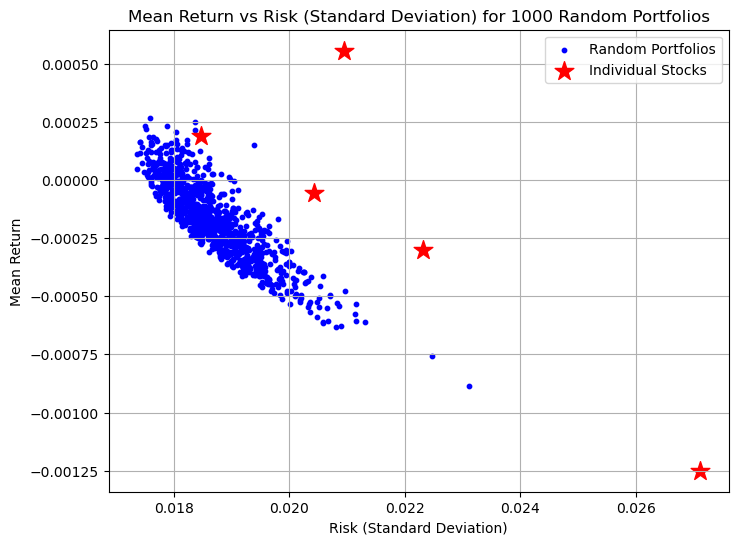

In [37]:
num_portfolios = 1000
portfolio_means = []
portfolio_stds = []

# 生成1000個隨機投資組合
for _ in range(num_portfolios):
    weights = np.random.random(len(return_columns))
    weights /= np.sum(weights)
    portfolio_mean = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns_data.cov(), weights)))
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# 畫出1000個隨機投資組合的點
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_stds, portfolio_means, color='blue', s=10, label='Random Portfolios')

# 加上(b)算出的個別股票
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200, label='Individual Stocks')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.title('Mean Return vs Risk (Standard Deviation) for 1000 Random Portfolios')
plt.legend()
plt.grid(True)
plt.show()




# e) Assuming no short sales are allowed, draw the efficient frontier in the figure of b.

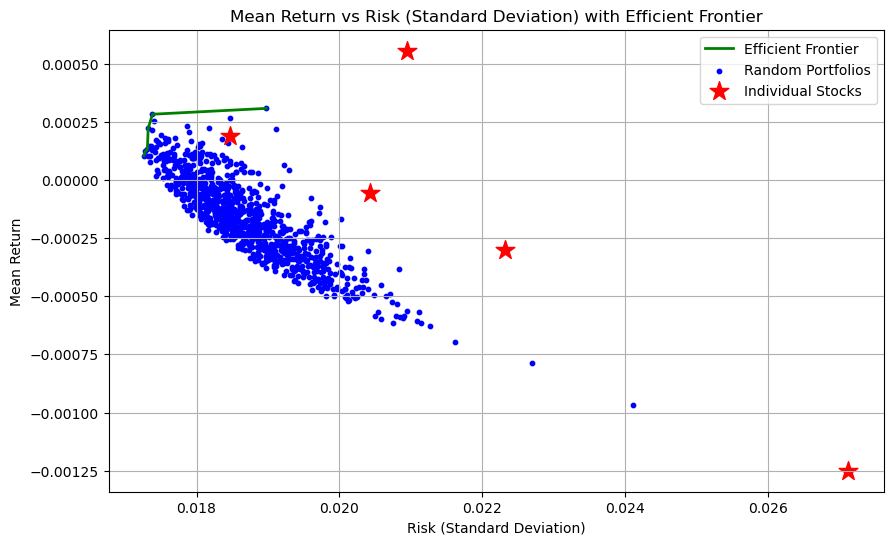

In [40]:
# 將隨機生成的投資組合按風險（標準差）進行排序
sorted_portfolios = sorted(zip(portfolio_stds, portfolio_means))

# 從排序後的結果中選出有效前緣點（取最小標準差對應的最大報酬率）
efficient_stds = []
efficient_means = []
max_mean = -float('inf')

for std, mean in sorted_portfolios:
    if mean > max_mean:
        efficient_stds.append(std)
        efficient_means.append(mean)
        max_mean = mean

# 繪製有效前緣與隨機投資組合的點
plt.figure(figsize=(10, 6))
plt.plot(efficient_stds, efficient_means, color='green', lw=2, label='Efficient Frontier')
plt.scatter(portfolio_stds, portfolio_means, color='blue', marker='o', s=10, label='Random Portfolios')
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200, label='Individual Stocks')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.title('Mean Return vs Risk (Standard Deviation) with Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()


